In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve


In [3]:
df = pd.read_csv("cleaned_heart_disease_data.csv")
X = df.drop(columns=['num'])
df['num'] = np.where(df['num']>0,1,0)
y = df['num']

In [4]:
X = df.drop(columns=['num','chol','trestbps'])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Supervised Learning


Training and evaluating Logistic Regression
--- Logistic Regression Classification Report ---
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Accuracy: 0.9016 | AUC: 0.9321
Training and evaluating Decision Tree
--- Decision Tree Classification Report ---
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

Accuracy: 0.8033 | AUC: 0.8028
Training and evaluating Random Forest
--- Random Forest Classification Report ---
              precision   

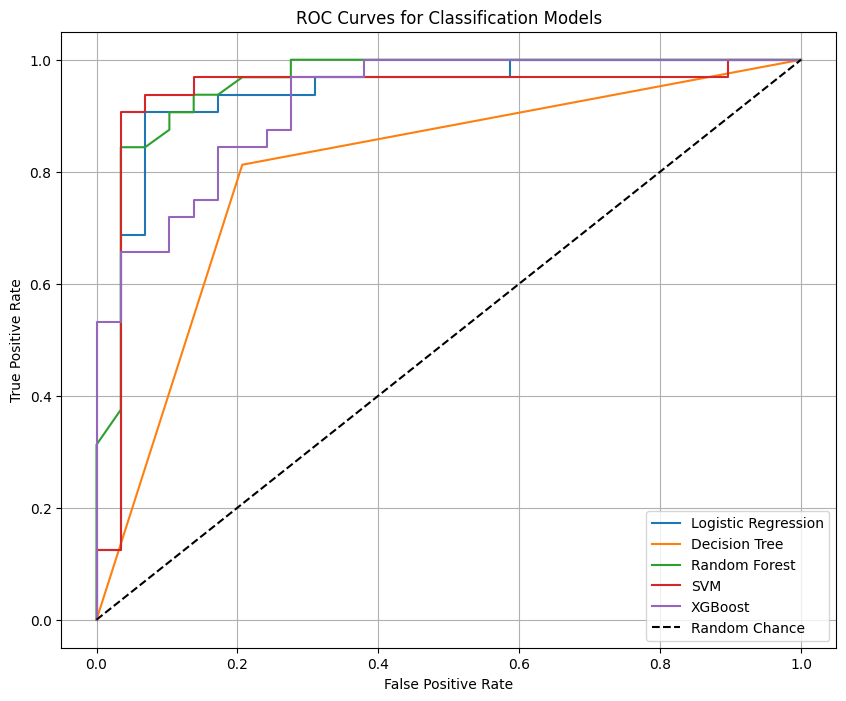

In [8]:


# Define models to train
models = {
    'Logistic Regression': LogisticRegression(max_iter=100),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=200),
    'SVM': SVC(probability=True),
    'XGBoost': XGBClassifier(eval_metric='logloss')
}

# Assuming X_train, X_test, y_train, y_test are defined
# Assuming X_train_scaled and X_test_scaled are scaled versions of features for applicable models

plt.figure(figsize=(10, 8))

for name, model in models.items():
    print(f"Training and evaluating {name}")

    if name in ['Logistic Regression', 'SVM', 'XGBoost']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)

    print(f"--- {name} Classification Report ---")
    print(classification_report(y_test, y_pred, zero_division=0))

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba[:, 1])  # Compute AUC for binary classification

    print(f"Accuracy: {acc:.4f} | AUC: {auc:.4f}")

    # Plot ROC curve
    if len(set(y_test)) > 2:
        # Handle multiclass: plot one-vs-rest ROC curves for each class
        for i in range(y_proba.shape[1]):
            fpr, tpr, _ = roc_curve(y_test == i, y_proba[:, i])
            plt.plot(fpr, tpr, label=f'{name} Class {i}')
    else:
        fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
        plt.plot(fpr, tpr, label=name)

    # Save the trained model to pickle file
    filename = f"{name.replace(' ', '_').lower()}_model.pkl"
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classification Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
